In [1]:
#Objective:
# val acc ~72% normally on a small dataset
#To counter over-fitting, use dropout (?), weight decay (L2 regularization) and data augmentation
# val acc due to drop out and augmentation increased to ~82
# next to further improve: use a pre-trained convnet model!
# A pre-trained model, trained on a larger set. A generic model develops features that can
#be used even on a small data problem
#2 ways to use it: 1) feature extraction 2 options 2) fine-tuning
#we are using VGG16 pre-trained model architechture (ResNet, Inception, Xception etc are others)

In [ ]:
#THIS IS SMALL CONVNET EXAMPLE

In [1]:
#System Check
import sys;print('python version:',sys.version) 
import tensorflow as tf;print('tf_version:',tf.__version__) #tf: 2.1 
from tensorflow import keras; print('keras version:',keras.__version__) 
import keras 
print("keras version on its own:",keras.__version__) #tf keras and keras library can have different versions
from tensorflow.python.platform import build_info as tf_build_info 
#print('CUDA Version:',tf_build_info.cuda_version_number) 
#print('CUDNN Version:',tf_build_info.cudnn_version_number)

import tensorflow as tf
tf.test.is_gpu_available() # True/False
print("GPU Status:",tf.test.is_gpu_available())

#Releases the python gpu memory
from numba import cuda
cuda.select_device(0)
cuda.close()

"""
# Or only check for gpu's with cuda support
tf.test.is_gpu_available(cuda_only=True) 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
"""

python version: 3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 21:14:29) 
[GCC 7.3.0]
tf_version: 1.14.0
keras version: 2.2.4-tf
keras version on its own: 2.2.4
GPU Status: False


Using TensorFlow backend.


"\n# Or only check for gpu's with cuda support\ntf.test.is_gpu_available(cuda_only=True) \nfrom tensorflow.python.client import device_lib\nprint(device_lib.list_local_devices())\n"

In [3]:
import os, shutil

#source
original_dataset_dir='/home/oj/Downloads//all_4_in_one'


#destination
base_dir = '/home/oj/Downloads//all_4_in_one_small'
os.mkdir(base_dir)

####Create train, validation and test folders and sub-folders. Keras needs sub-folders:https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
# Create a Test Dir##### #create a folder "train": os.path.join gets path and the name of the new directory#os.mkdir(directory_name_path) makes it#You have to error check whether the folder already exist
train_dir = os.path.join(original_dataset_dir, 'train') 
if os.path.exists(train_dir):
    pass #does nothing
else :
    os.mkdir(train_dir)

train_sub_dir = os.path.join(train_dir, 'train_sub') 
if os.path.exists(train_sub_dir):
    pass #does nothing
else :
    os.mkdir(train_sub_dir)
    
# #####Create a Validation Dir#####
validation_dir = os.path.join(original_dataset_dir, 'validation') 
if os.path.exists(validation_dir):
    pass #does nothing
else :
    os.mkdir(validation_dir)

validation_sub_dir = os.path.join(validation_dir, 'validation_sub') 
if os.path.exists(validation_sub_dir):
    pass #does nothing
else :
    os.mkdir(validation_sub_dir)

# ####Create a Test Dir#####
test_dir = os.path.join(original_dataset_dir, 'test') 
if os.path.exists(test_dir):
    pass #does nothing
else :
    os.mkdir(test_dir)

test_sub_dir = os.path.join(test_dir, 'test_sub') 
if os.path.exists(test_sub_dir):
    pass #does nothing
else :
    os.mkdir(test_sub_dir)
    

####5.2.2 - Images are Not Randomly Saved. Copies images from main folder to respective train,val and test #####
#Train
fnames = ['{}.jpg'.format(i) for i in range(1,161)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_sub_dir, fname)
    shutil.copyfile(src, dst)
#Validation
fnames = ['{}.jpg'.format(i) for i in range(161,181)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_sub_dir, fname)
    shutil.copyfile(src, dst)
#Test
fnames = ['{}.jpg'.format(i) for i in range(181,201)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_sub_dir, fname)
    shutil.copyfile(src, dst)

print('train images: ',len(os.listdir(train_sub_dir)))
print('val images: ',len(os.listdir(validation_sub_dir)))
print('test images: ',len(os.listdir(test_sub_dir)))


train images:  160
val images:  20
test images:  20


In [4]:
#Model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) #input shape is arbitray choice. The actual cat/dog images are greather than this size
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #one more convnet and max pooling layer from 5.1 example. This augments the network and resuces the size of the feature map so they are not too large when they reach the flatten layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) #network of 512 dense layers
model.add(layers.Dense(1, activation='sigmoid')) #either cat or dog
model.summary() #depth of the feature map is increasing from 32 to 128 but the size is decreasing from 148*148 to 7*7

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
#model compile: setting the loss function; optimizer
from keras import optimizers
#Making network/model ready for training
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc']) #Metrics to monitor during training and testing—Here, we’ll only care about accuracy(the fraction of the images that were correctly classified).



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
#Data pre-processing. Requires following:
#jpg>RGB channels>floating point tensors> normalize or rescale the pixel values from 0-255 to [0,1]
#Keras' IamgeDataGenerator class takes care of that
#by this step, should give you the input image as a tensor and associated labels for training

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the target directory
        target_size=(150, 150),# All images will be resized to 150x150
        batch_size=20, #every epoch, 2000 images are drawn in a batch of 20, 100 times
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

#check output of the tensors
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape) #output is x samples of 150x150*RGB. where x is the batch size
    print('labels batch shape:', labels_batch.shape) #binary labels. shape same as batch size
    break

Found 160 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [7]:
#fitting the data (answers, input images) into the model/network is the same as training it
history = model.fit_generator( #model.fit - we name it history? interesting
      train_generator, #aboove train generator
      steps_per_epoch=8, #samples per epoch. total train_images/batch_size. Our case 2000/20=100; 2000 is cat+dog; takes these many gradien steps before going to the next epoch
      epochs=30,
      validation_data=validation_generator, #can be tuple or a data generator; but if latter then you should specify val_steps that tell the process how many batches to draw from the validation generator; otherwise, goes on forever
      validation_steps=20)

Epoch 1/30
8/8 [==============================] - 6s 790ms/step - loss: 0.1467 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 2/30
8/8 [==============================] - 6s 792ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.2747e-04 - val_acc: 1.0000
Epoch 3/30
8/8 [==============================] - 7s 814ms/step - loss: 2.4169e-04 - acc: 1.0000 - val_loss: 6.4337e-05 - val_acc: 1.0000
Epoch 4/30
8/8 [==============================] - 7s 822ms/step - loss: 9.0861e-05 - acc: 1.0000 - val_loss: 2.7274e-05 - val_acc: 1.0000
Epoch 5/30
8/8 [==============================] - 7s 837ms/step - loss: 4.3517e-05 - acc: 1.0000 - val_loss: 1.2308e-05 - val_acc: 1.0000
Epoch 6/30
8/8 [==============================] - 7s 847ms/step - loss: 2.2985e-05 - acc: 1.0000 - val_loss: 5.6034e-06 - val_acc: 1.0000
Epoch 7/30
8/8 [==============================] - 7s 861ms/step - loss: 1.1816e-05 - acc: 1.0000 - val_loss: 2.8920e-06 - val_acc: 1.0000
Epoch 8/30
8/8 [==============================

In [8]:
#Save ya model - good practice
model.save('opus_small_convnet.h5')
model.to_json()
model.save_weights('opus_smallconvnet_weights.h5')

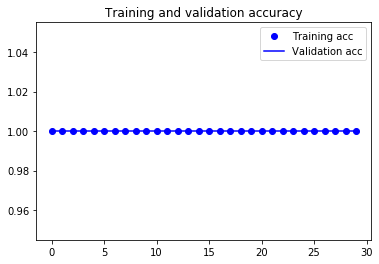

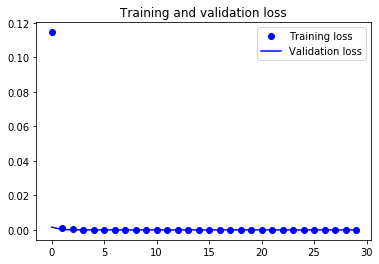

In [8]:
#plot the loss and accuracy of the model over the training and validation data during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
#0.1 in y-axis is 10%; x-axis=epochs
#This plot is characteristic of over-fitting.
#Validation accuracy caps at 0.7 and loss increases over the epochs. 
#Why do we not see that with training? Is it because training images 2000 are double in number 1000?
#To couter over-fitting, use dropout, weight decay (L2 regularization) and data augmentation

In [9]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 20 images belonging to 1 classes.
test acc: 1.0
